## Kernel Density Estimator on MCMC Walker Distributions

We build a smoothing routine for MCMC walker distribution using KDE. We use the package `seaborn` to plot this.

## Initializing

In [2]:
import seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os

In [111]:
matplotlib.rcParams['figure.figsize'] = (10, 10)
matplotlib.rcParams['font.family'] = "Times New Roman"
matplotlib.rcParams['font.size'] = 18
matplotlib.rcParams['lines.markerfacecolor'] = 'black'
matplotlib.rcParams['lines.linewidth'] = 1.5

In [4]:
## Setup paths
dirpath = "/Users/suzutsuki-ch/Work/ARMADA/"
save_directory = "/Users/suzutsuki-ch/Work/ARMADA/Targets" ## path for saved files
armada_file = "/Users/suzutsuki-ch/Work/ARMADA/full_target_list.csv" ## path to csv target file
note = 'Chi' ## note for saved files (e.g. 'hip' for hipparcos distance, or 'gaia')

In [5]:
target_hd = '6456'
df = pd.read_csv(armada_file,dtype=object)

## Create directory for saved files, if it doesn't already exist
directory = "%s/HD_%s/"%(save_directory,target_hd)
if not os.path.exists(directory):
    print("Creating directory")
    os.makedirs(directory)

In [19]:
# Defining UMICH Color Pallete'
umich_palette = ['#ffcb05','#e3b90d','#c6a715','#aa941d','#8e8225','#71702c','#555e34','#394b3c','#1c3944','#00274c']

## Load Chain and Generate Plots

In [106]:
chains = np.load("%s/HD_%s_%s_chains.npy"%(directory,target_hd,"final_fixedFeH"))
age_chain = chains[:,0]
mass1_chain = chains[:,1]
mass2_chain = chains[:,2]

/Users/suzutsuki-ch/opt/anaconda3/envs/isochrones/lib/python3.10/site-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(
/Users/suzutsuki-ch/opt/anaconda3/envs/isochrones/lib/python3.10/site-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(
/Users/suzutsuki-ch/opt/anaconda3/envs/isochrones/lib/python3.10/site-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(


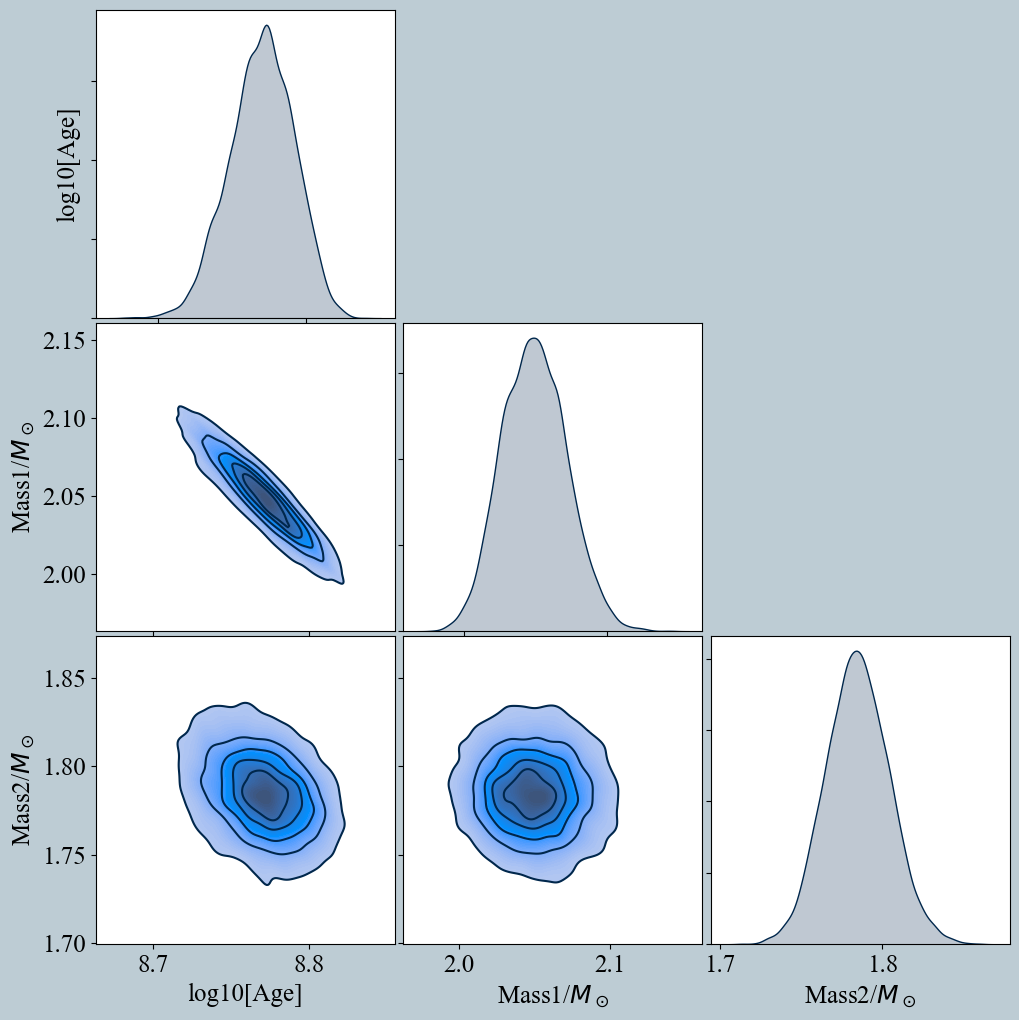

In [113]:
fig, ax = plt.subplots(3,3)
fig.patch.set_facecolor('#BDCCD4')

fig.delaxes(ax[0,1])
fig.delaxes(ax[0,2])
fig.delaxes(ax[1,2])


ax[0,0].set_ylabel("log10[Age]")
ax[1,0].set_ylabel(r"Mass1/$M_\odot$")
ax[2,0].set_ylabel(r"Mass2/$M_\odot$")

ax[0,0].sharex(ax[0,2])
ax[0,1].sharex(ax[0,2])

ax[0,0].axes.yaxis.set_ticklabels([])
ax[1,1].axes.yaxis.set_ticklabels([])
ax[0,0].axes.xaxis.set_ticklabels([])
ax[1,0].axes.xaxis.set_ticklabels([])
ax[1,1].axes.xaxis.set_ticklabels([])
ax[2,2].axes.yaxis.set_ticklabels([])
ax[2,1].axes.yaxis.set_ticklabels([])


ax[2,0].set_xlabel("log10[Age]")
ax[2,1].set_xlabel(r"Mass1/$M_\odot$")
ax[2,2].set_xlabel(r"Mass2/$M_\odot$")


seaborn.kdeplot(x=age_chain, fill=True, ax=ax[0,0], color="#00274c")
seaborn.kdeplot(x=age_chain, y=mass1_chain, fill=True, ax=ax[1,0], color="#00274c", levels=50)
seaborn.kdeplot(x=age_chain, y=mass2_chain, fill=True, ax=ax[2,0], color="#00274c", levels=50)
seaborn.kdeplot(x=mass1_chain, y=mass2_chain, fill=True, ax=ax[2,1], color="#00274c", levels=50)

seaborn.kdeplot(x=age_chain, y=mass1_chain, linewidth=1.5, ax=ax[1,0], color="#00274c", levels=6)
seaborn.kdeplot(x=age_chain, y=mass2_chain, linewidth=1.5, ax=ax[2,0], color="#00274c", levels=6)
seaborn.kdeplot(x=mass1_chain, y=mass2_chain, linewidth=1.5, ax=ax[2,1], color="#00274c", levels=6)

seaborn.kdeplot(x=mass1_chain, fill=True, ax=ax[1,1], color="#00274c")
seaborn.kdeplot(x=mass2_chain, fill=True, ax=ax[2,2], color="#00274c")

ax[2,2].set_ylabel("")
ax[1,1].set_ylabel("")

plt.tight_layout(pad=0.0, w_pad=0.0, h_pad=-0.0)

plt.savefig("%s/HD_%s_%s_CornerSmooth.png"%(directory,target_hd,"FixedFeH"), dpi=240, bbox_inches="tight")



In [92]:
chains = np.load("%s/HD_%s_%s_chains.npy"%(directory,target_hd,"vary_FeH"))
age_chain = chains[:,0]
mass1_chain = chains[:,1]
mass2_chain = chains[:,2]
feh_chain = chains[:,3]

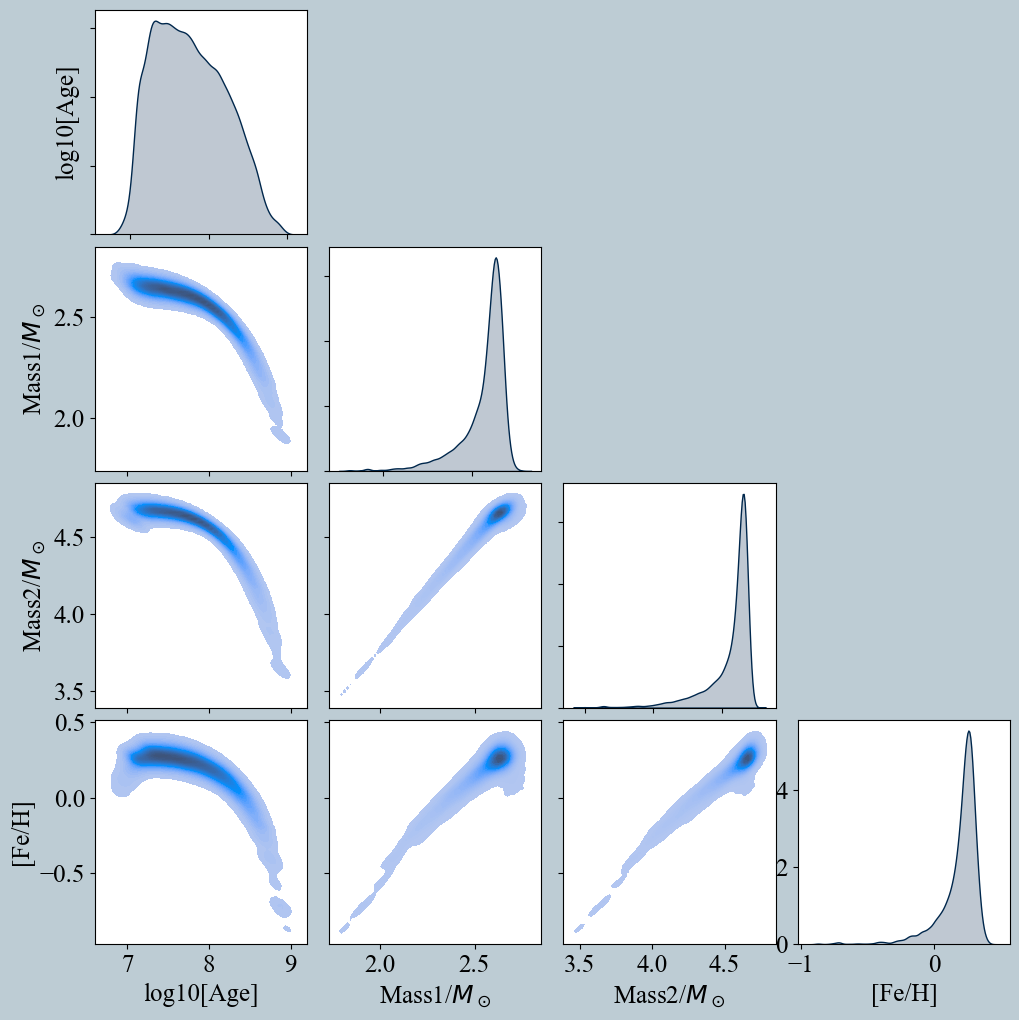

In [104]:
fig, ax = plt.subplots(4,4)
fig.patch.set_facecolor('#BDCCD4')

fig.delaxes(ax[0,1])
fig.delaxes(ax[0,2])
fig.delaxes(ax[1,2])
fig.delaxes(ax[0,3])
fig.delaxes(ax[1,3])
fig.delaxes(ax[2,3])

ax[0,0].set_ylabel("log10[Age]")
ax[1,0].set_ylabel(r"Mass1/$M_\odot$")
ax[2,0].set_ylabel(r"Mass2/$M_\odot$")
ax[3,0].set_ylabel("[Fe/H]")

ax[3,0].set_xlabel("log10[Age]")
ax[3,1].set_xlabel(r"Mass1/$M_\odot$")
ax[3,2].set_xlabel(r"Mass2/$M_\odot$")
ax[3,3].set_xlabel("[Fe/H]")

ax[0,0].axes.yaxis.set_ticklabels([])
ax[1,1].axes.yaxis.set_ticklabels([])
ax[0,0].axes.xaxis.set_ticklabels([])
ax[1,0].axes.xaxis.set_ticklabels([])
ax[1,1].axes.xaxis.set_ticklabels([])
ax[2,2].axes.yaxis.set_ticklabels([])
ax[2,0].axes.xaxis.set_ticklabels([])
ax[2,1].axes.xaxis.set_ticklabels([])
ax[2,2].axes.xaxis.set_ticklabels([])
ax[2,1].axes.yaxis.set_ticklabels([])
ax[3,1].axes.yaxis.set_ticklabels([])
ax[3,2].axes.yaxis.set_ticklabels([])



seaborn.kdeplot(x=age_chain, fill=True, ax=ax[0,0], color="#00274c")
seaborn.kdeplot(x=age_chain, y=mass1_chain, fill=True, ax=ax[1,0], color="#00274c", levels=40, thresh=0.01, gridsize=70)
seaborn.kdeplot(x=age_chain, y=mass2_chain, fill=True, ax=ax[2,0], color="#00274c", levels=40, thresh=0.01, gridsize=70)

seaborn.kdeplot(x=mass1_chain, y=mass2_chain, fill=True, ax=ax[2,1], color="#00274c", levels=40, thresh=0.01, gridsize=70)
seaborn.kdeplot(x=mass1_chain, fill=True, ax=ax[1,1], color="#00274c")
seaborn.kdeplot(x=mass2_chain, fill=True, ax=ax[2,2], color="#00274c")

seaborn.kdeplot(x=feh_chain, fill=True, ax=ax[3,3], color="#00274c")
seaborn.kdeplot(x=mass1_chain, y=feh_chain, fill=True, ax=ax[3,1], color="#00274c", levels=40, thresh=0.01, gridsize=70)
seaborn.kdeplot(x=mass2_chain, y=feh_chain, fill=True, ax=ax[3,2], color="#00274c", levels=40, thresh=0.01, gridsize=70)
seaborn.kdeplot(x=age_chain, y=feh_chain, fill=True, ax=ax[3,0], color="#00274c", levels=40, thresh=0.01, gridsize=70)

ax[2,2].set_ylabel("")
ax[1,1].set_ylabel("")
ax[3,3].set_ylabel("")

plt.tight_layout(pad=0.0, w_pad=0.0, h_pad=-0.0)

plt.savefig("%s/HD_%s_%s_CornerSmooth.png"%(directory,target_hd,"varyFeH"), dpi=240, bbox_inches="tight")